In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.stats as astats
from astropy import units as u
from mpl_toolkits.axes_grid1 import AxesGrid
import sys
from matplotlib.path import Path
from scipy import interpolate

In [2]:
# Opens a SMASH fits file and stores the data in the field_data variable. This variable is a XRx36C array with the following columns:
# 0-ID 1-RA 2-DEC 3-RAERR 4-DECERR 5-RASCATTER 6-DECSCATTER 7-NDET 8-DEPTHFLAG 9-SRCINDX 10-SRCFINDX 11-U 12-UERR 13-USCATTER 14-NDETU 15-G 16-GERR 17-GSCATTER 18-NDETG 19-R 20-RERR 21-RSCATTER 22-NDETR 23-I 24-IERR 25-ISCATTER 26-NDETI 27-Z 28-ZERR 29-ZSCATTER 30-NDETZ 31-CHI 32-SHARP 33-FLAG 34-PROB 35-EBV
def read_fits (name):
    hdulist = fits.open(name)
    field_data = hdulist[1].data
    header = hdulist[1].header
    hdulist.close()
    return field_data, header

In [13]:
field = '13'

file_name_complete = '/vol/ph/astro_data/pmassana/SMASH_DATA/allobj_files/Field%s_combined_allobj.fits.gz' % (field)
data_complete, header_complete = read_fits(file_name_complete)

file_name = '/vol/ph/astro_data/pmassana/SMASH_DATA/stars2/Field%s_allobj_stars.fits.gz' % (field)
data, header = read_fits(file_name)

In [14]:
mag_complete = data_complete['G']
colour_complete = data_complete['G'] - data_complete['I']

mag = data['G']
colour = data['G'] - data['I']

In [15]:
xbinsize = 0.02
ybinsize = 0.06
xbins = np.arange( start = -2, stop = 3+xbinsize, step = xbinsize)
ybins = np.arange( start = 14, stop = 26+ybinsize, step = ybinsize)

hist2d_data = np.histogram2d(colour,mag, bins = [xbins,ybins])
print(np.max(hist2d_data[0]))

81.0


/user/HS128/pm00518/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


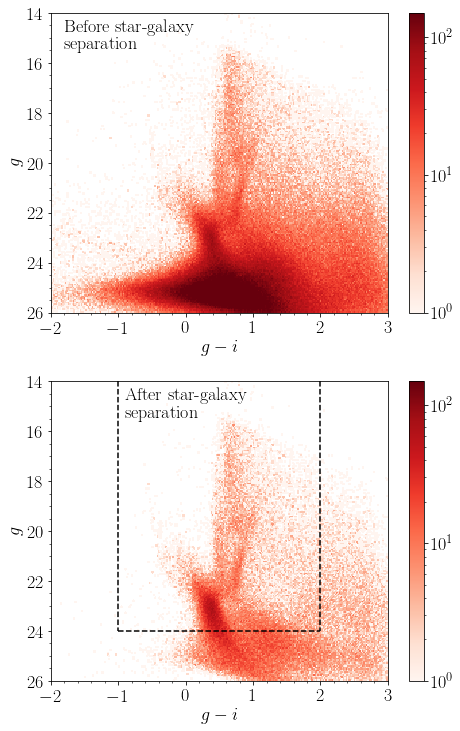

In [16]:
#xbinsize = 0.02
#ybinsize = 0.06
#xbins = np.arange( start = -2, stop = 3, step = xbinsize)
#ybins = np.arange( start = 14, stop = 26, step = ybinsize)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size':18})
plt.figure(1, figsize=(7,10.5))

plt.subplot(211)
plt.hist2d(colour_complete, mag_complete, bins = [xbins,ybins], cmap = 'Reds', cmin = 1, norm = matplotlib.colors.LogNorm(vmax=150), rasterized=True)
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('$g-i$')
plt.ylabel('$g$')
plt.minorticks_on()
plt.annotate('Before star-galaxy \n separation',(-1.8, 15.5))

plt.subplot(212)
plt.hist2d(colour, mag, bins = [xbins,ybins], cmap = 'Reds', cmin = 1, norm = matplotlib.colors.LogNorm(vmax=150), rasterized=True)
plt.hlines(24, -1, 2, ls='--')
plt.vlines(-1, 14, 24, ls='--')
plt.vlines(2, 14, 24, ls='--')
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('$g-i$')
plt.ylabel('$g$')
plt.minorticks_on()
plt.annotate('After star-galaxy \n separation',(-0.9, 15.5))

plt.tight_layout()
plt.savefig('/user/HS128/pm00518/Documents/PhD/CMD_SMASH/Plots/star-galaxy_sep_13.pdf', bbox_inches='tight')
plt.show()